<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Performance Python

In [1]:
import warnings
warnings.simplefilter('ignore')

## Loops

### Python

In [2]:
import random

In [3]:
def average_py(n):
    s = 0  
    for i in range(n):
        s += random.random()  
    return s / n  

In [4]:
n = 10000000  

In [5]:
%time average_py(n)  

CPU times: user 610 ms, sys: 4.29 ms, total: 614 ms
Wall time: 612 ms


0.5000966717071822

In [6]:
%timeit average_py(n)  

601 ms ± 21.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%time sum([random.random() for _ in range(n)]) / n  

CPU times: user 649 ms, sys: 119 ms, total: 769 ms
Wall time: 767 ms


0.5000322823613507

### NumPy 

In [8]:
import numpy as np

In [9]:
def average_np(n):
    s = np.random.random(n)  
    return s.mean()  

In [10]:
%time average_np(n)

CPU times: user 143 ms, sys: 886 ms, total: 1.03 s
Wall time: 115 ms


np.float64(0.4998864420289679)

In [11]:
%timeit average_np(n)

44.1 ms ± 526 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
s = np.random.random(n)
s.nbytes  

80000000

### Numba

In [170]:
import numba

In [171]:
average_nb = numba.jit(average_py, nopython=True)  
numba_np = numba.jit(average_np, nopython=True)

In [172]:
%time average_nb(n) #First iteration has some overhead, causing slowness

CPU times: user 83.8 ms, sys: 25.9 ms, total: 110 ms
Wall time: 111 ms


0.5000359373502776

In [173]:
%time average_nb(n)  

CPU times: user 39.4 ms, sys: 367 μs, total: 39.8 ms
Wall time: 39.7 ms


0.5001428985667411

In [174]:
%timeit average_nb(n)  

25.5 ms ± 32.1 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [175]:
%time numba_np(n)

CPU times: user 237 ms, sys: 29.2 ms, total: 266 ms
Wall time: 276 ms


0.5001267307327438

In [176]:
%time numba_np(n)

CPU times: user 53.2 ms, sys: 10.8 ms, total: 64.1 ms
Wall time: 63.9 ms


0.5000624038381906

In [178]:
%timeit numba_np(n) # numpy + numba is a bit slower?!

51.5 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Cython

In [18]:
%load_ext Cython

In [19]:
%%cython -a
import random  
def average_cy1(int n):  
    cdef int i  
    cdef float s = 0  
    for i in range(n):
        s += random.random()
    return s / n

Content of stderr:
/Users/juan/.cache/ipython/cython/_cython_magic_d47a40a77156d3603fd0dc3b9976e34cd357a0bf.c:3969:26: warning: code will never be executed [-Wunreachable-code]
 3969 |                 module = PyImport_ImportModuleLevelObject(
      |                          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 warning generated.
ld: warning: duplicate -rpath '/Users/juan/data/static/conda-envs/py4fi/lib' ignored

In [20]:
%time average_cy1(n)

CPU times: user 383 ms, sys: 1.89 ms, total: 385 ms
Wall time: 384 ms


0.4998553395271301

In [21]:
%timeit average_cy1(n)

373 ms ± 4.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%%cython
from libc.stdlib cimport rand  
cdef extern from 'limits.h':  
    int INT_MAX  
cdef int i
cdef float rn
for i in range(5):
    rn = rand() / INT_MAX  
    print(rn)

Content of stderr:
/Users/juan/.cache/ipython/cython/_cython_magic_f39699891adbd98b8175e4a503b9268a9b563c18.c:2408:7: warning: code will never be executed [-Wunreachable-code]
 2408 |       PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      |       ^~~~~~~~~~~~~~~
1 warning generated.
ld: warning: duplicate -rpath '/Users/juan/data/static/conda-envs/py4fi/lib' ignored0.3835020661354065
0.5194163918495178
0.8309653401374817
0.03457210958003998
0.05346163362264633


In [23]:
%%cython -a
from libc.stdlib cimport rand  
cdef extern from 'limits.h':  
    int INT_MAX  
def average_cy2(int n):
    cdef int i
    cdef float s = 0
    for i in range(n):
        s += rand() / INT_MAX  
    return s / n

Content of stderr:
/Users/juan/.cache/ipython/cython/_cython_magic_1984f187931e75909619d72f09d35273aeca380e.c:2355:7: warning: code will never be executed [-Wunreachable-code]
 2355 |       PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      |       ^~~~~~~~~~~~~~~
1 warning generated.
ld: warning: duplicate -rpath '/Users/juan/data/static/conda-envs/py4fi/lib' ignored

In [24]:
%time average_cy2(n)

CPU times: user 80.8 ms, sys: 890 μs, total: 81.7 ms
Wall time: 81.4 ms


0.500017523765564

In [25]:
%timeit average_cy2(n) # Does not beat Numba.

77.5 ms ± 50.3 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Prime Numbers

### Pure Python

In [26]:
def is_prime(I):
    if I % 2 == 0: return False  
    for i in range(3, int(I ** 0.5) + 1, 2):  
        if I % i == 0: return False  
    return True  

In [27]:
n = int(1e8 + 3)  
n

100000003

In [28]:
%time is_prime(n)

CPU times: user 19 μs, sys: 0 ns, total: 19 μs
Wall time: 21.9 μs


False

In [29]:
p1 = int(1e8 + 7)  
p1

100000007

In [30]:
%time is_prime(p1)

CPU times: user 212 μs, sys: 0 ns, total: 212 μs
Wall time: 214 μs


True

In [31]:
p2 = 100109100129162907  

In [32]:
p2.bit_length()  

57

In [33]:
%time is_prime(p2)

CPU times: user 8.45 s, sys: 21.3 ms, total: 8.47 s
Wall time: 8.47 s


True

### Numba

In [34]:
is_prime_nb = numba.jit(is_prime, nopython=True)

In [35]:
%time is_prime_nb(n)  

CPU times: user 59.5 ms, sys: 7.19 ms, total: 66.7 ms
Wall time: 83.6 ms


False

In [36]:
%time is_prime_nb(n)  

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 8.11 μs


False

In [37]:
%time is_prime_nb(p1)

CPU times: user 9 μs, sys: 0 ns, total: 9 μs
Wall time: 12.2 μs


True

In [38]:
%time is_prime_nb(p2)  

CPU times: user 165 ms, sys: 782 μs, total: 166 ms
Wall time: 166 ms


True

### Cython

In [39]:
%%cython
def is_prime_cy1(I):
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

Content of stderr:
/Users/juan/.cache/ipython/cython/_cython_magic_b41e7a9c25d852369275787493f48886da29d8db.c:3633:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
 3633 |                     CYTHON_FALLTHROUGH;
      |                     ^
/Users/juan/.cache/ipython/cython/_cython_magic_b41e7a9c25d852369275787493f48886da29d8db.c:557:34: note: expanded from macro 'CYTHON_FALLTHROUGH'
  557 |       #define CYTHON_FALLTHROUGH __attribute__((fallthrough))
      |                                  ^
/Users/juan/.cache/ipython/cython/_cython_magic_b41e7a9c25d852369275787493f48886da29d8db.c:3644:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
 3644 |                     CYTHON_FALLTHROUGH;
      |                     ^
/Users/juan/.cache/ipython/cython/_cython_magic_b41e7a9c25d852369275787493f48886da29d8db.c:557:34: note: expanded from macro 'CYTHON_FALLTHROUGH'
  557 |       #define CYTHON_FALLTHROUGH __attribu

In [40]:
%timeit is_prime(p1)

195 μs ± 776 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [41]:
%timeit is_prime_cy1(p1)

116 μs ± 87.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [42]:
%%cython
def is_prime_cy2(long I):  
    cdef long i  
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

Content of stderr:
/Users/juan/.cache/ipython/cython/_cython_magic_38b753af7b3bbce9fe9a932b58fee7439215f9c3.c:3684:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
 3684 |                     CYTHON_FALLTHROUGH;
      |                     ^
/Users/juan/.cache/ipython/cython/_cython_magic_38b753af7b3bbce9fe9a932b58fee7439215f9c3.c:557:34: note: expanded from macro 'CYTHON_FALLTHROUGH'
  557 |       #define CYTHON_FALLTHROUGH __attribute__((fallthrough))
      |                                  ^
/Users/juan/.cache/ipython/cython/_cython_magic_38b753af7b3bbce9fe9a932b58fee7439215f9c3.c:3695:21: warning: fallthrough annotation in unreachable code [-Wunreachable-code-fallthrough]
 3695 |                     CYTHON_FALLTHROUGH;
      |                     ^
/Users/juan/.cache/ipython/cython/_cython_magic_38b753af7b3bbce9fe9a932b58fee7439215f9c3.c:557:34: note: expanded from macro 'CYTHON_FALLTHROUGH'
  557 |       #define CYTHON_FALLTHROUGH __attribu

In [43]:
%timeit is_prime_cy2(p1)

6.4 μs ± 203 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [44]:
%time is_prime_nb(p2)

CPU times: user 164 ms, sys: 982 μs, total: 165 ms
Wall time: 165 ms


True

In [45]:
%time is_prime_cy2(p2)

CPU times: user 197 ms, sys: 1.2 ms, total: 199 ms
Wall time: 198 ms


True

### Multiprocessing

In [ ]:
# import multiprocessing as mp
# if __name__ == '__main__':
#     pool = mp.Pool(processes=4)  
#     %time pool.map(is_prime, 10 * [p1])  
#     pool.close() # Prevents any more tasks from being submitted
#     pool.join()  # Waits for the worker processes to complete their current tasks

In [180]:
# pool = mp.Pool(processes=4)  

<b style="color: red;">This currently does not work on Macs with Apple Silicon.</b>

In [ ]:
# %time pool.map(is_prime, 10 * [p1])  

In [49]:
# %time pool.map(is_prime_nb, 10 * [p2])  

In [50]:
# %time pool.map(is_prime_cy2, 10 * [p2])  

## Fibonacci Numbers

### Recursive Algorithm

In [51]:
from numba import njit

In [52]:
def fib_rec_py1(n):
    if n < 2:
        return n
    else:
        return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)

In [53]:
%time fib_rec_py1(35)

CPU times: user 2.11 s, sys: 5.57 ms, total: 2.11 s
Wall time: 2.11 s


9227465

In [54]:
@njit
def fib_rec_nb(n):
    if n < 2:
        return n
    else:
        return fib_rec_nb(n - 1) + fib_rec_nb(n - 2)

In [55]:
%time fib_rec_nb(35)

CPU times: user 90.6 ms, sys: 4.72 ms, total: 95.3 ms
Wall time: 94 ms


9227465

In [56]:
%time fib_rec_nb(35)

CPU times: user 53.4 ms, sys: 335 μs, total: 53.7 ms
Wall time: 53.5 ms


9227465

In [57]:
%%cython
def fib_rec_cy(int n):
    if n < 2:
        return n
    else:
        return fib_rec_cy(n - 1) + fib_rec_cy(n - 2)

Content of stderr:
ld: warning: duplicate -rpath '/Users/juan/data/static/conda-envs/py4fi/lib' ignored

In [58]:
%time fib_rec_cy(35)

CPU times: user 472 ms, sys: 3.83 ms, total: 476 ms
Wall time: 474 ms


9227465

In [59]:
from functools import lru_cache as cache

In [60]:
@cache(maxsize=None)  
def fib_rec_py2(n):
    if n < 2:
        return n
    else:
        return fib_rec_py2(n - 1) + fib_rec_py2(n - 2)

In [61]:
%time fib_rec_py2(35)  

CPU times: user 17 μs, sys: 10 μs, total: 27 μs
Wall time: 29.8 μs


9227465

In [62]:
%time fib_rec_py2(80)  

CPU times: user 16 μs, sys: 3 μs, total: 19 μs
Wall time: 21 μs


23416728348467685

### Iterative Algorithm 

In [63]:
def fib_it_py(n):
    x, y = 0, 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [64]:
%time fib_it_py(80)

CPU times: user 6 μs, sys: 1 μs, total: 7 μs
Wall time: 7.87 μs


23416728348467685

In [65]:
fib_it_nb = numba.jit(fib_it_py)

In [66]:
%time fib_it_nb(80)

CPU times: user 32.9 ms, sys: 3.3 ms, total: 36.2 ms
Wall time: 35.2 ms


23416728348467685

In [67]:
%time fib_it_nb(80)

CPU times: user 4 μs, sys: 0 ns, total: 4 μs
Wall time: 5.96 μs


23416728348467685

In [68]:
%%cython
def fib_it_cy1(int n):
    cdef long i
    cdef long x = 0, y = 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

Content of stderr:
ld: warning: duplicate -rpath '/Users/juan/data/static/conda-envs/py4fi/lib' ignored

In [69]:
%time fib_it_cy1(80)

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 10 μs


23416728348467685

In [70]:
%%time
fn = fib_rec_py2(150)  
print(fn)  

9969216677189303386214405760200
CPU times: user 132 μs, sys: 45 μs, total: 177 μs
Wall time: 178 μs


In [71]:
fn.bit_length()  

103

In [72]:
%%time 
fn = fib_it_nb(150)  
print(fn)  

6792540214324356296
CPU times: user 192 μs, sys: 136 μs, total: 328 μs
Wall time: 262 μs


In [73]:
fn.bit_length()  

63

In [74]:
%%time
fn = fib_it_cy1(150)  
print(fn)  

6792540214324356296
CPU times: user 35 μs, sys: 4 μs, total: 39 μs
Wall time: 40.1 μs


In [75]:
fn.bit_length()  

63

In [76]:
%%cython
cdef extern from *:
    ctypedef int int128 '__int128_t'  
def fib_it_cy2(int n):
    cdef int128 i  
    cdef int128 x = 0, y = 1  
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

Content of stderr:
ld: warning: duplicate -rpath '/Users/juan/data/static/conda-envs/py4fi/lib' ignored

In [77]:
%%time
fn = fib_it_cy2(150)  
print(fn)  

9969216677189303386214405760200
CPU times: user 274 μs, sys: 128 μs, total: 402 μs
Wall time: 402 μs


In [78]:
fn.bit_length()  

103

## The Number Pi

The code example is taken from [StackExchange](https://codereview.stackexchange.com/questions/69370/monte-carlo-pi-calculation).

In [79]:
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

In [80]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1)  # Gen 500 samples with random x, y coordinates.
      for _ in range(500)]

In [81]:
rn = np.array(rn)
rn[:5]

array([[ 0.92010629,  0.41441715],
       [-0.53577168,  0.53283398],
       [ 0.45391997,  0.65170695],
       [-0.64263125, -0.45166983],
       [-0.51389336, -0.75107607]])

(-1.1, 1.1)

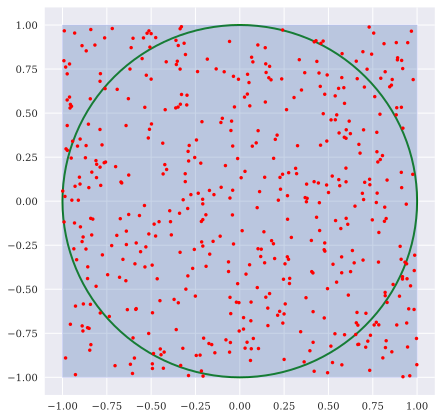

In [82]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='g', lw=2.0,
                  facecolor='None')  
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.3)  
ax.add_patch(circ)  
ax.add_patch(box)  
plt.plot(rn[:, 0], rn[:, 1], 'r.')  
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)
# plt.savefig('../../images/ch10/perf_01.png');

In [83]:
n = int(1e7)

In [84]:
%time rn = np.random.random((n, 2)) * 2 - 1

CPU times: user 450 ms, sys: 49.1 ms, total: 499 ms
Wall time: 184 ms


In [85]:
rn.nbytes

160000000

In [86]:
%time distance = np.sqrt((rn ** 2).sum(axis=1))  
distance[:8].round(3)

CPU times: user 123 ms, sys: 53.3 ms, total: 176 ms
Wall time: 186 ms


array([0.638, 0.442, 0.735, 0.499, 1.045, 1.058, 0.726, 0.096])

In [87]:
%time frac = (distance <= 1.0).sum() / len(distance)  

CPU times: user 10.9 ms, sys: 4.15 ms, total: 15.1 ms
Wall time: 13.8 ms


In [88]:
pi_mcs = frac * 4  
pi_mcs  

np.float64(3.1411808)

In [89]:
# Iterative, more RAM efficient
# First, write a regular Pyhton, then numba.
def mcs_pi_py(n):
    circle = 0# Count the points inside the circle.
    for _ in range(n):
        x, y = random.random(), random.random()
        if (x ** 2 + y ** 2) ** 0.5 <= 1:
            circle += 1
    return (4 * circle) / n# Then calculate the fraction of the samples inside/outside.

In [90]:
%time mcs_pi_py(n)

CPU times: user 2.49 s, sys: 16.7 ms, total: 2.51 s
Wall time: 2.55 s


3.1414528

In [91]:
mcs_pi_nb = numba.jit(mcs_pi_py)

In [92]:
%time mcs_pi_nb(n)# First numba compile always takes longer.

CPU times: user 183 ms, sys: 21 ms, total: 204 ms
Wall time: 273 ms


3.1422872

In [93]:
%time mcs_pi_nb(n)

CPU times: user 51.4 ms, sys: 860 μs, total: 52.3 ms
Wall time: 53.2 ms


3.1416372

In [94]:
%%cython -a
import random
def mcs_pi_cy1(int n):
    cdef int i, circle = 0
    cdef float x, y, z
    for i in range(n):
        x, y = random.random(), random.random()
        z = (x ** 2 + y ** 2) ** 0.5
        if z <= 1:
            circle += 1
    return (4 * circle) / n

Content of stderr:
/Users/juan/.cache/ipython/cython/_cython_magic_854a0963644c430045496a9c516b0a4e2b5c9b21.c:4147:26: warning: code will never be executed [-Wunreachable-code]
 4147 |                 module = PyImport_ImportModuleLevelObject(
      |                          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 warning generated.
ld: warning: duplicate -rpath '/Users/juan/data/static/conda-envs/py4fi/lib' ignored

In [95]:
%time mcs_pi_cy1(n)

CPU times: user 497 ms, sys: 5.94 ms, total: 503 ms
Wall time: 507 ms


3.1409756

In [96]:
%%cython -a
from libc.stdlib cimport rand
cdef extern from 'limits.h':
    int INT_MAX
def mcs_pi_cy2(int n):
    cdef int i, circle = 0
    cdef float x, y, z
    for i in range(n):
        x, y = rand() / INT_MAX, rand() / INT_MAX
        z = (x ** 2 + y ** 2) ** 0.5
        if z <= 1:
            circle += 1
    return (4 * circle) / n

Content of stderr:
/Users/juan/.cache/ipython/cython/_cython_magic_52c0e6c9005becb095b173f761e6953c80590fa6.c:2478:7: warning: code will never be executed [-Wunreachable-code]
 2478 |       PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      |       ^~~~~~~~~~~~~~~
/Users/juan/.cache/ipython/cython/_cython_magic_52c0e6c9005becb095b173f761e6953c80590fa6.c:2472:7: warning: code will never be executed [-Wunreachable-code]
 2472 |       PyErr_SetString(PyExc_ZeroDivisionError, "float division");
      |       ^~~~~~~~~~~~~~~
2 warnings generated.
ld: warning: duplicate -rpath '/Users/juan/data/static/conda-envs/py4fi/lib' ignored

In [97]:
%time mcs_pi_cy2(n)

CPU times: user 156 ms, sys: 1.57 ms, total: 158 ms
Wall time: 158 ms


3.1419388

## Binomial Trees

### Python

In [98]:
import math

In [99]:
S0 = 36.  
T = 1.0  
r = 0.06  
sigma = 0.2  

In [100]:
def simulate_tree(M):
    dt = T / M  
    u = math.exp(sigma * math.sqrt(dt))  
    d = 1 / u  
    S = np.zeros((M + 1, M + 1))
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return S

In [101]:
np.set_printoptions(formatter={'float':
                               lambda x: '%6.2f' % x})  # Format the print to be 6 width, round to 2 decimals, floating.

In [102]:
simulate_tree(4)  

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [103]:
%time simulate_tree(500)  

CPU times: user 57.8 ms, sys: 2.95 ms, total: 60.8 ms
Wall time: 59.9 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

### NumPy

In [104]:
M = 4

In [105]:
up = np.arange(M + 1)
up = np.resize(up, (M + 1, M + 1))  
up

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [106]:
down = up.T * 2  
down

array([[0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [4, 4, 4, 4, 4],
       [6, 6, 6, 6, 6],
       [8, 8, 8, 8, 8]])

In [107]:
up - down  

array([[ 0,  1,  2,  3,  4],
       [-2, -1,  0,  1,  2],
       [-4, -3, -2, -1,  0],
       [-6, -5, -4, -3, -2],
       [-8, -7, -6, -5, -4]])

In [108]:
dt = T / M

In [109]:
S0 * np.exp(sigma * math.sqrt(dt) * (up - down))  

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [110]:
def simulate_tree_np(M):
    dt = T / M
    up = np.arange(M + 1)
    up = np.resize(up, (M + 1, M + 1))
    down = up.transpose() * 2
    S = S0 * np.exp(sigma * math.sqrt(dt) * (up - down))
    return S

In [111]:
simulate_tree_np(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [ 29.47,  32.57,  36.00,  39.79,  43.97],
       [ 24.13,  26.67,  29.47,  32.57,  36.00],
       [ 19.76,  21.84,  24.13,  26.67,  29.47],
       [ 16.18,  17.88,  19.76,  21.84,  24.13]])

In [112]:
%time simulate_tree_np(500)

CPU times: user 3.64 ms, sys: 2.72 ms, total: 6.37 ms
Wall time: 5.76 ms


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [ 35.36,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [ 34.73,  35.05,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.41,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.40,   0.41,   0.41]])

### Numba

In [113]:
simulate_tree_nb = numba.jit(simulate_tree)

In [114]:
simulate_tree_nb(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [115]:
%time simulate_tree_nb(500)

CPU times: user 223 μs, sys: 286 μs, total: 509 μs
Wall time: 511 μs


array([[ 36.00,  36.32,  36.65, ..., 3095.69, 3123.50, 3151.57],
       [  0.00,  35.68,  36.00, ..., 3040.81, 3068.13, 3095.69],
       [  0.00,   0.00,  35.36, ..., 2986.89, 3013.73, 3040.81],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]])

In [116]:
%timeit simulate_tree_nb(500)

213 μs ± 23.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Cython

In [117]:
%%cython -a
import numpy as np
cimport cython
from libc.math cimport exp, sqrt
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef float sigma = 0.2
def simulate_tree_cy(int M):
    cdef int z, t, i
    cdef float dt, u, d
    cdef float[:, :] S = np.zeros((M + 1, M + 1),
                                  dtype=np.float32)  
    dt = T / M
    u = exp(sigma * sqrt(dt))
    d = 1 / u
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return np.array(S)

Content of stderr:
/Users/juan/.cache/ipython/cython/_cython_magic_584d932011a487bb222bc1823edad9079f87d33e.c:22309:26: warning: code will never be executed [-Wunreachable-code]
 22309 |                 module = PyImport_ImportModuleLevelObject(
       |                          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 warning generated.
ld: warning: duplicate -rpath '/Users/juan/data/static/conda-envs/py4fi/lib' ignored

In [118]:
simulate_tree_cy(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]], dtype=float32)

In [119]:
%time simulate_tree_cy(500)

CPU times: user 680 μs, sys: 802 μs, total: 1.48 ms
Wall time: 807 μs


array([[ 36.00,  36.32,  36.65, ..., 3095.77, 3123.59, 3151.65],
       [  0.00,  35.68,  36.00, ..., 3040.89, 3068.21, 3095.77],
       [  0.00,   0.00,  35.36, ..., 2986.97, 3013.81, 3040.89],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.42,   0.42,   0.43],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.41,   0.42],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.41]],
      dtype=float32)

In [120]:
%timeit S = simulate_tree_cy(500)

130 μs ± 1.06 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Monte Carlo Simulation

### Python

In [121]:
M = 100  
I = 50000  

In [122]:
def mcs_simulation_py(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)  
    for t in range(1, M + 1):  
        for i in range(I):  
            S[t, i] = S[t-1, i] * math.exp((r - sigma ** 2 / 2) * dt +
                                         sigma * math.sqrt(dt) * rn[t, i])  
    return S      

In [123]:
%time S = mcs_simulation_py((M, I))

CPU times: user 2.96 s, sys: 41.3 ms, total: 3 s
Wall time: 3.08 s


In [124]:
S[-1].mean()  

np.float64(38.243944773506165)

In [125]:
S0 * math.exp(r * T)  

38.22611567563295

In [126]:
K = 40.  

In [127]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()  

In [128]:
C0

np.float64(3.855054055766935)

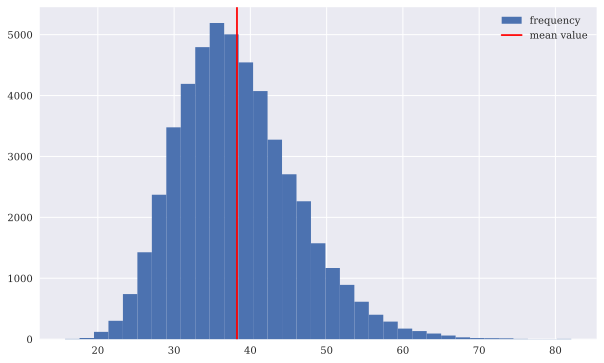

In [129]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=35, label='frequency')
plt.axvline(S[-1].mean(), color='r', label='mean value')
plt.legend(loc=0)

### NumPy

In [130]:
def mcs_simulation_np(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M + 1):  
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt +
                               sigma * math.sqrt(dt) * rn[t]) 
    return S      

In [131]:
%time S = mcs_simulation_np((M, I))

CPU times: user 663 ms, sys: 478 ms, total: 1.14 s
Wall time: 181 ms


In [132]:
S[-1].mean()

np.float64(38.25412588462143)

In [133]:
%timeit S = mcs_simulation_np((M, I))

155 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Numba 

In [134]:
mcs_simulation_nb = numba.jit(mcs_simulation_py)

In [135]:
%time S = mcs_simulation_nb((M, I))  

CPU times: user 490 ms, sys: 35.8 ms, total: 526 ms
Wall time: 552 ms


In [136]:
%time S = mcs_simulation_nb((M, I))  

CPU times: user 142 ms, sys: 12.5 ms, total: 154 ms
Wall time: 158 ms


In [137]:
S[-1].mean()

np.float64(38.23952498423538)

In [138]:
C0 = math.exp(-r * T) * np.maximum(K - S[-1], 0).mean()

In [139]:
C0

np.float64(3.8203606960605256)

In [140]:
%timeit S = mcs_simulation_nb((M, I))  

151 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Cython &mdash; Sequential

In [141]:
%%cython
import numpy as np
cimport numpy as np
cimport cython
from libc.math cimport exp, sqrt
cdef float S0 = 36.
cdef float T = 1.0
cdef float r = 0.06
cdef float sigma = 0.2
@cython.boundscheck(False)
@cython.wraparound(False)
def mcs_simulation_cy(p):
    cdef int M, I
    M, I = p
    cdef int t, i
    cdef float dt = T / M
    cdef double[:, :] S = np.zeros((M + 1, I))
    cdef double[:, :] rn = np.random.standard_normal((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        for i in range(I):
            S[t, i] = S[t-1, i] * exp((r - sigma ** 2 / 2) * dt +
                                         sigma * sqrt(dt) * rn[t, i])
    return np.array(S) 

Content of stderr:
In file included from /Users/juan/.cache/ipython/cython/_cython_magic_a139d754562db3bdea66892f0bcd2a18be2969ac.c:1251:
In file included from /Users/juan/data/static/conda-envs/py4fi/lib/python3.10/site-packages/numpy/_core/include/numpy/arrayobject.h:5:
In file included from /Users/juan/data/static/conda-envs/py4fi/lib/python3.10/site-packages/numpy/_core/include/numpy/ndarrayobject.h:12:
In file included from /Users/juan/data/static/conda-envs/py4fi/lib/python3.10/site-packages/numpy/_core/include/numpy/ndarraytypes.h:1909:
/Users/juan/data/static/conda-envs/py4fi/lib/python3.10/site-packages/numpy/_core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^
/Users/juan/.cache/ipython/cython/_cython_magic_a139d754562db3bdea66892f0bcd2a18be2969ac.c:24681:26: warning: code 

In [142]:
%time S = mcs_simulation_cy((M, I))

CPU times: user 152 ms, sys: 40.2 ms, total: 192 ms
Wall time: 189 ms


In [143]:
S[-1].mean()

np.float64(38.2577513815692)

In [144]:
%timeit S = mcs_simulation_cy((M, I))

158 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Multiprocessing

In [189]:
import multiprocessing as mp

In [190]:
pool = mp.Pool(processes=4)  

In [191]:
p = 20  

<b style="color: red;">This currently does not work on Macs with Apple Silicon.</b>

In [192]:
# %timeit S = np.hstack(pool.map(mcs_simulation_np, p * [(M, int(I / p))]))

Process SpawnPoolWorker-128:
Process SpawnPoolWorker-131:
Process SpawnPoolWorker-129:
Process SpawnPoolWorker-130:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/juan/data/static/conda-envs/py4fi/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/juan/data/static/conda-envs/py4fi/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/juan/data/static/conda-envs/py4fi/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/juan/data/static/conda-envs/py4fi/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/juan/data/static/conda-envs/py4fi/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/juan/data/static/conda-envs/py4fi/lib/python3.10/multiprocessing/pool.py", line 114, in worker
 

KeyboardInterrupt: 

In [149]:
# %timeit S = np.hstack(pool.map(mcs_simulation_nb, p * [(M, int(I / p))]))

In [150]:
# %timeit S = np.hstack(pool.map(mcs_simulation_cy, p * [(M, int(I / p))]))

## Recursive pandas Algorithm

### Data and Formula

In [151]:
import numba
import numpy as np
import pandas as pd

In [152]:
sym = 'SPY'

In [153]:
data = pd.DataFrame(pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                               index_col=0, parse_dates=True)[sym]).dropna()

In [154]:
alpha = 0.25

In [155]:
data['EWMA'] = data[sym]  

In [156]:
%%time
for t in zip(data.index, data.index[1:]):
    data.loc[t[1], 'EWMA'] = (alpha * data.loc[t[1], sym] +
                              (1 - alpha) * data.loc[t[0], 'EWMA'])  

CPU times: user 281 ms, sys: 3.55 ms, total: 285 ms
Wall time: 285 ms


In [157]:
data.head()

,SPY,EWMA
Date,,
2010-01-04,113.33,113.330000
2010-01-05,113.63,113.405000
2010-01-06,113.71,113.481250
2010-01-07,114.19,113.658438
2010-01-08,114.57,113.886328


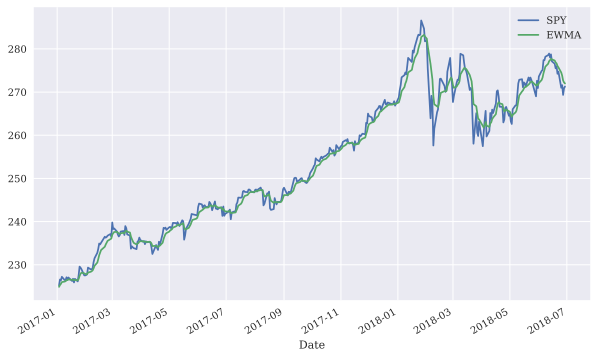

In [158]:
data[data.index > '2017-1-1'].plot(figsize=(10, 6));

### Pure Python

In [159]:
def ewma_py(x, alpha):
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1-alpha) * y[i-1]
    return y

In [160]:
%time data['EWMA_PY'] = ewma_py(data[sym], alpha)  

CPU times: user 33.3 ms, sys: 173 ms, total: 206 ms
Wall time: 22.3 ms


In [161]:
%time data['EWMA_PY'] = ewma_py(data[sym].values, alpha)  

CPU times: user 1.53 ms, sys: 7.87 ms, total: 9.4 ms
Wall time: 964 μs


### Numba

In [162]:
ewma_nb = numba.jit(ewma_py)

In [163]:
%time data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)  

CPU times: user 315 ms, sys: 772 ms, total: 1.09 s
Wall time: 139 ms


In [164]:
%timeit data['EWMA_NB'] = ewma_nb(data[sym].values, alpha)  

36.1 μs ± 623 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Cython

In [165]:
%%cython
import numpy as np
cimport cython
@cython.boundscheck(False)
@cython.wraparound(False)
def ewma_cy(double[:] x, float alpha):
    cdef int i
    cdef double[:] y = np.empty_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        y[i] = alpha * x[i] + (1 - alpha) * y[i - 1]
    return y

Content of stderr:
/Users/juan/.cache/ipython/cython/_cython_magic_2811a7647a6c0524de28d65a14d0e1f5e036ef98.c:22028:26: warning: code will never be executed [-Wunreachable-code]
 22028 |                 module = PyImport_ImportModuleLevelObject(
       |                          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 warning generated.
ld: warning: duplicate -rpath '/Users/juan/data/static/conda-envs/py4fi/lib' ignored

In [166]:
%time data['EWMA_CY'] = ewma_cy(data[sym].values, alpha)

CPU times: user 1.02 ms, sys: 998 μs, total: 2.02 ms
Wall time: 2.07 ms


In [167]:
%timeit data['EWMA_CY'] = ewma_cy(data[sym].values, alpha)

53.9 μs ± 693 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [168]:
data.head()

,SPY,EWMA,EWMA_PY,EWMA_NB,EWMA_CY
Date,,,,,
2010-01-04,113.33,113.330000,113.330000,113.330000,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-05,113.63,113.405000,113.405000,113.405000,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-06,113.71,113.481250,113.481250,113.481250,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-07,114.19,113.658438,113.658438,113.658438,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2010-01-08,114.57,113.886328,113.886328,113.886328,"[113.33, 113.405, 113.48125, 113.6584375, 113...."


In [169]:
data.tail()

,SPY,EWMA,EWMA_PY,EWMA_NB,EWMA_CY
Date,,,,,
2018-06-25,271.00,274.535176,274.535176,274.535176,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-26,271.60,273.801382,273.801382,273.801382,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-27,269.35,272.688537,272.688537,272.688537,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-28,270.89,272.238903,272.238903,272.238903,"[113.33, 113.405, 113.48125, 113.6584375, 113...."
2018-06-29,271.28,271.999177,271.999177,271.999177,"[113.33, 113.405, 113.48125, 113.6584375, 113...."


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>